<a href="https://colab.research.google.com/github/faruk17035/3rd-Work/blob/main/3rd_work%2BAAC%2BCalcium%2BLigghtGBM%2B10_fold_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [24]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/calcium/cal_AAC.csv' 
#df = pd.read_excel(file_name, index_col=0)
df = pd.read_csv(file_name)
#print(df.head()) # print the first 5 rows
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,Target
0,0.034483,0.120690,0.043103,0.060345,0.051724,0.103448,0.017241,0.060345,0.094828,0.051724,...,0.043103,0.025862,0.017241,0.043103,0.060345,0.060345,0.068966,0.000000,0.017241,1
1,0.062762,0.050209,0.041841,0.083682,0.037657,0.087866,0.012552,0.037657,0.062762,0.071130,...,0.066946,0.025105,0.016736,0.066946,0.083682,0.054393,0.058577,0.008368,0.041841,1
2,0.084507,0.112676,0.028169,0.000000,0.000000,0.070423,0.014085,0.042254,0.098592,0.098592,...,0.014085,0.014085,0.028169,0.084507,0.098592,0.112676,0.042254,0.000000,0.014085,1
3,0.085714,0.114286,0.028571,0.014286,0.000000,0.057143,0.014286,0.028571,0.100000,0.128571,...,0.000000,0.014286,0.028571,0.085714,0.071429,0.114286,0.057143,0.000000,0.028571,1
4,0.085366,0.085366,0.073171,0.060976,0.109756,0.036585,0.000000,0.012195,0.073171,0.109756,...,0.036585,0.036585,0.012195,0.024390,0.060976,0.048780,0.036585,0.024390,0.012195,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,0.037500,0.000000,0.025000,0.012500,0.100000,0.087500,0.037500,0.050000,0.050000,0.187500,...,0.050000,0.037500,0.050000,0.012500,0.050000,0.062500,0.087500,0.037500,0.012500,0
1297,0.036585,0.060976,0.012195,0.012195,0.097561,0.012195,0.048780,0.097561,0.036585,0.158537,...,0.060976,0.048780,0.060976,0.012195,0.036585,0.048780,0.048780,0.012195,0.085366,0
1298,0.072289,0.036145,0.060241,0.048193,0.024096,0.060241,0.024096,0.024096,0.048193,0.096386,...,0.048193,0.072289,0.096386,0.036145,0.072289,0.096386,0.012048,0.000000,0.036145,0
1299,0.141026,0.000000,0.038462,0.051282,0.025641,0.051282,0.000000,0.076923,0.025641,0.089744,...,0.051282,0.038462,0.064103,0.076923,0.115385,0.012821,0.064103,0.012821,0.012821,0


In [27]:
#Split data into independent (X) and dependent(Y) columns

y = df['Target'].values
X = df.drop('Target', axis=1).values

In [17]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 20)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [21]:
###### new code add + Raf

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
#X_test = sc.transform(X_test)

In [29]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X, y)

LGBMClassifier()

## Applying Kfold CV

In [30]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X, y = y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.08 %
Standard Deviation: 1.18 %


In [20]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.57 %
Standard Deviation: 1.51 %


In [43]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = cross_val_predict(clf, X_train, y_train, cv=10)
cmann = confusion_matrix(y_train, y_pred)
print(cmann)
accuracy = (cmann[0][0]+cmann[1][1])/(cmann[0][1] + cmann[1][0] +cmann[0][0] +cmann[1][1]) 
print(accuracy*100)

[[1044   12]
 [  21  210]]
97.43589743589743


In [44]:
from sklearn.metrics import roc_auc_score
print("AUC = ",roc_auc_score(y_train,y_pred))

AUC =  0.9488636363636364


In [45]:
from sklearn.metrics import matthews_corrcoef,confusion_matrix
matthews_corrcoef(y_train,y_pred)

0.911866113894372

In [46]:
TP = cmann[0][0]
TN = cmann[1][1]
FP = cmann[0][1]
FN = cmann[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 1044
True Negatives: 210
False Positives: 12
False Negatives: 21


In [47]:
sensitivity=(TP/(TP+FN))
sensitivity

0.9802816901408451

In [48]:
specificity = (TN/(TN+FP))
specificity

0.9459459459459459

In [49]:
precision = (TP/(TP+FP))
recall = (TP/(TP+FN))
print(precision)
print(recall)

0.9886363636363636
0.9802816901408451


In [50]:
f1 = (2*(precision*recall))/(precision+recall)
f1

0.9844413012729843

In [51]:
## AUPR score
from sklearn.metrics import average_precision_score
average_precision_score(y_train,y_pred)

0.8762678762678763

### Tuning Hyperparameters

In [27]:
#import optuna.integration.lightgbm as lgb
from datetime import datetime 
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


Accuracy with LGBM =  0.9693486590038314
AUC score with LGBM is:  0.9581516587677724


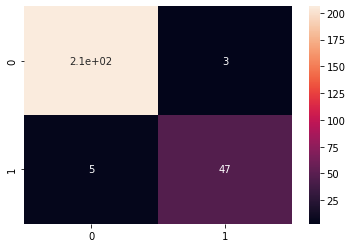

In [28]:
#Light GBM

import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)

# https://lightgbm.readthedocs.io/en/latest/Parameters.html
lgbm_params = {'learning_rate':0.1, 'boosting_type':'gbdt',    #Try dart for better accuracy
              'objective':'binary',
              'metric':['auc', 'binary_logloss'],
              'num_leaves':100,
              'max_depth':10}

start=datetime.now()
clf = lgb.train(lgbm_params, d_train, 50) #50 iterations. Increase iterations for small learning rates
stop=datetime.now()
execution_time_lgbm = stop-start
#print("LGBM execution time is: ", execution_time_lgbm)

#Prediction on test data
y_pred_lgbm=clf.predict(X_test)

#convert into binary values 0/1 for classification
for i in range(0, X_test.shape[0]):
    if y_pred_lgbm[i]>=.5:       # setting threshold to .5
       y_pred_lgbm[i]=1
    else:  
       y_pred_lgbm[i]=0
       
#Print accuracy
print ("Accuracy with LGBM = ", metrics.accuracy_score(y_pred_lgbm,y_test))
#Confusion matrix

cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot=True)


print("AUC score with LGBM is: ", roc_auc_score(y_pred_lgbm,y_test))